# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [1]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv



%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/matthouk/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

## Load Data

In [5]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head(20)

neighborhood  sale_price_sqr_foot  housing_units  \
year                                                                      
2010                   Alamo Square           291.182945         372560   
2010                     Anza Vista           267.932583         372560   
2010                        Bayview           170.098665         372560   
2010               Buena Vista Park           347.394919         372560   
2010               Central Richmond           319.027623         372560   
2010                 Central Sunset           418.172493         372560   
2010                 Corona Heights           369.359338         372560   
2010                     Cow Hollow           569.379968         372560   
2010                  Croker Amazon           165.645730         372560   
2010                Diamond Heights           456.930822         372560   
2010                      Downtown            241.804552         372560   
2010  Eureka Valley/Dolores Heights           403.118313         372560   
2010                      Excelsior           364.928336         372560   
2010       Financial District North           401.749967         372560   
2010       Financial District South           162.821210         372560   
2010                  Forest Knolls           209.049327         372560   
2010                      Glen Park           715.586438         372560   
2010            Golden Gate Heights           551.801119         372560   
2010                 Haight Ashbury           254.473779         372560   
2010                   Hayes Valley           272.284980         372560   

      gross_rent  
year              
2010        1239  
2010        1239  
2010        1239  
2010        1239  
2010        1239  
2010        1239  
2010        1239  
2010        1239  
2010        1239  
2010        1239  
2010        1239  
2010        1239  
2010        1239  
2010        1239  
2010        1239  
2010        1239  
2010        1239  
2010        1239  
2010        1239  
2010        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [6]:
# Calculate the mean number of housing units per year (hint: use groupby) 
mean_housing = sfo_data['housing_units'].groupby('year').mean()
mean_housing_std = mean_housing.std()
mean_housing_max = mean_housing.max()
mean_housing_min = mean_housing.min()

mean_housing

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [7]:
# Show the values to ensure they make sense: 
print(f'STD: {mean_housing_std} Max: {mean_housing_max} Min: {mean_housing_min}')

STD: 4206.0007132667015 Max: 384242 Min: 372560


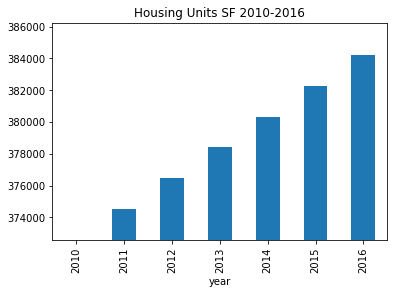

In [8]:
# Use the Pandas plot function to plot the average housing units per year.
# used data like min and max to set ylimit. Added 2000 so that 2016 was not at the top of the chart. 
# Note that I did not use other plots like hvpolot and such as those were not part of the insctructions but would make more sense. 
mean_housing.plot.bar(x='Year', y='Housing Units', ylim=[mean_housing_min, (mean_housing_max+2000)], title='Housing Units SF 2010-2016')

# These were in the notebook for use with pyplot but the insctructions didnt say to use pyplot. 
# plt.show()
# plt.close(fig_housing_units)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [9]:
# Calculate the average gross rent and average sale price per square foot
gross_rent = sfo_data[['sale_price_sqr_foot', 'gross_rent']].groupby('year').mean()
gross_rent

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

In [10]:
# Plot the Average Gross Rent per Year as a Line Chart 
gross_rent.hvplot.line(y='gross_rent', ylabel = 'Gross Rent', title = ('AVERAGE GROSS RENT PER YEAR'))

# A simpler plot would be gross_rent.plot.line(y='gross_rent', ylabel = 'Gross Rent', title = ('AVERAGE GROSS RENT PER YEAR'))

:Curve   [year]   (gross_rent)

### Average Sales Price per Year

In [11]:
# Plot the Average Sales Price per Year as a line chart
gross_rent.hvplot.line(y='sale_price_sqr_foot', ylabel ='AVG Sale Price', title = ('AVERAGE SALE PRICE PER SQ FT. PER YEAR'))

:Curve   [year]   (sale_price_sqr_foot)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [12]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# The data provided was already showing mean for sale_price for each neighborhood so I dont think any change is needed there. It is also already sorted by neighborhood. 
# The output shown in this notebook showed the index reset. 

nbrhood_data = sfo_data[['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent']].reset_index()
nbrhood_data.head(20)

year                   neighborhood  sale_price_sqr_foot  housing_units  \
0   2010                   Alamo Square           291.182945         372560   
1   2010                     Anza Vista           267.932583         372560   
2   2010                        Bayview           170.098665         372560   
3   2010               Buena Vista Park           347.394919         372560   
4   2010               Central Richmond           319.027623         372560   
5   2010                 Central Sunset           418.172493         372560   
6   2010                 Corona Heights           369.359338         372560   
7   2010                     Cow Hollow           569.379968         372560   
8   2010                  Croker Amazon           165.645730         372560   
9   2010                Diamond Heights           456.930822         372560   
10  2010                      Downtown            241.804552         372560   
11  2010  Eureka Valley/Dolores Heights           403.118313         372560   
12  2010                      Excelsior           364.928336         372560   
13  2010       Financial District North           401.749967         372560   
14  2010       Financial District South           162.821210         372560   
15  2010                  Forest Knolls           209.049327         372560   
16  2010                      Glen Park           715.586438         372560   
17  2010            Golden Gate Heights           551.801119         372560   
18  2010                 Haight Ashbury           254.473779         372560   
19  2010                   Hayes Valley           272.284980         372560   

    gross_rent  
0         1239  
1         1239  
2         1239  
3         1239  
4         1239  
5         1239  
6         1239  
7         1239  
8         1239  
9         1239  
10        1239  
11        1239  
12        1239  
13        1239  
14        1239  
15        1239  
16        1239  
17        1239  
18        1239  
19        1239

In [156]:
# figure out how to pull the data 
# remember to change some df names, this looks bad 
examplea = nbrhood_data.loc[nbrhood_data['neighborhood']=='Alamo Square']
examplea

year  neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0    2010  Alamo Square           291.182945         372560        1239
59   2011  Alamo Square           272.527310         374507        1530
118  2012  Alamo Square           183.099317         376454        2324
176  2013  Alamo Square           387.794144         378401        2971
233  2014  Alamo Square           484.443552         380348        3528
293  2015  Alamo Square           602.115877         382295        3739
351  2016  Alamo Square           340.981835         384242        4390

In [14]:
# Load in the panel stuff 
import panel as pn
from panel.interact import interact
from panel import widgets

pn.extension()

In [20]:
# Test out since function below is not running properly: 
# def choose_year(year):
#    return year
# list_of_years = ['2019', '2018', '2017', '2016', '2015']
# interact(choose_year, year=list_of_years)

In [19]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# Define function to create plot
neighborhood_choices = nbrhood_data.neighborhood.unique()
def nbrhood_plot(neighborhood_input):
    output_nbrhood = nbrhood_data.loc[nbrhood_data['neighborhood']== neighborhood_input].sort_values('year')

    return output_nbrhood.hvplot.line(
        x="year",
        y="sale_price_sqr_foot",
        xlabel = 'Year',
        ylabel ='AVG Sale Price per Sq. Foot',
        title=f"Neighborhood: {neighborhood_input}",
    )


# Render plot with Panel interactive widget
interact(nbrhood_plot, neighborhood_input=neighborhood_choices)

Column
    [0] Column
        [0] Select(name='neighborhood_input', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive02913')

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [71]:
import numpy as np
# Getting the data from the top 10 expensive neighborhoods
# Created a pivot table in order to get mean values by neighborhood. Used numpy to get mean for each column. 
neighborhood_values = pd.pivot_table(data = nbrhood_data, index = ['neighborhood'], aggfunc = {'sale_price_sqr_foot':np.mean, 'housing_units':np.mean, 'gross_rent':np.mean})

# created df after sorting by value we want and taking the top 10 using head 
most_expensive = neighborhood_values.sort_values('sale_price_sqr_foot', ascending=False).head(10).reset_index()
most_expensive

neighborhood   gross_rent  housing_units  sale_price_sqr_foot
0  Union Square District  2555.166667      377427.50           903.993258
1         Merced Heights  3414.000000      380348.00           788.844818
2          Miraloma Park  2155.250000      375967.25           779.810842
3        Pacific Heights  2817.285714      378401.00           689.555817
4          Westwood Park  3959.000000      382295.00           687.087575
5         Telegraph Hill  2817.285714      378401.00           676.506578
6       Presidio Heights  2817.285714      378401.00           675.350212
7             Cow Hollow  2817.285714      378401.00           665.964042
8           Potrero Hill  2817.285714      378401.00           662.013613
9            South Beach  2099.000000      375805.00           650.124479

In [72]:
# Plotting the data from the top 10 expensive neighborhoods
most_expensive.hvplot.bar(
    x="neighborhood",
    y='sale_price_sqr_foot', 
    rot=90
    ).opts(xlabel='Neighborhood', ylabel='AVG Price per Sq. Foot', title = 'Top 10 Expensive Neighborhoods in SFO', width=900, height=400)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

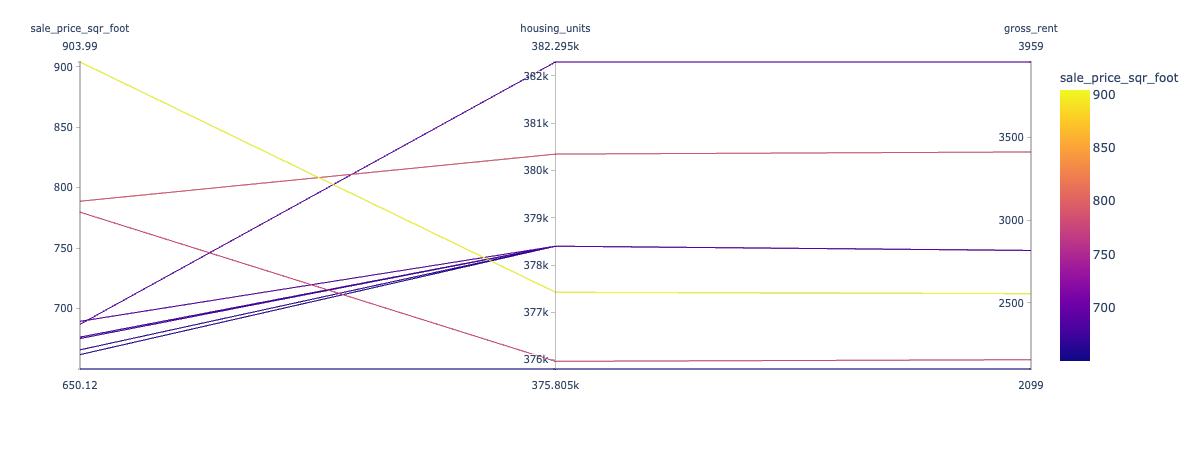

In [73]:
# Parallel Coordinates Plot
# Note that this matches the output of the default graph for this notebook, however, it is only the top 10 most expensive and not all. 
px.parallel_coordinates(most_expensive, color='sale_price_sqr_foot')

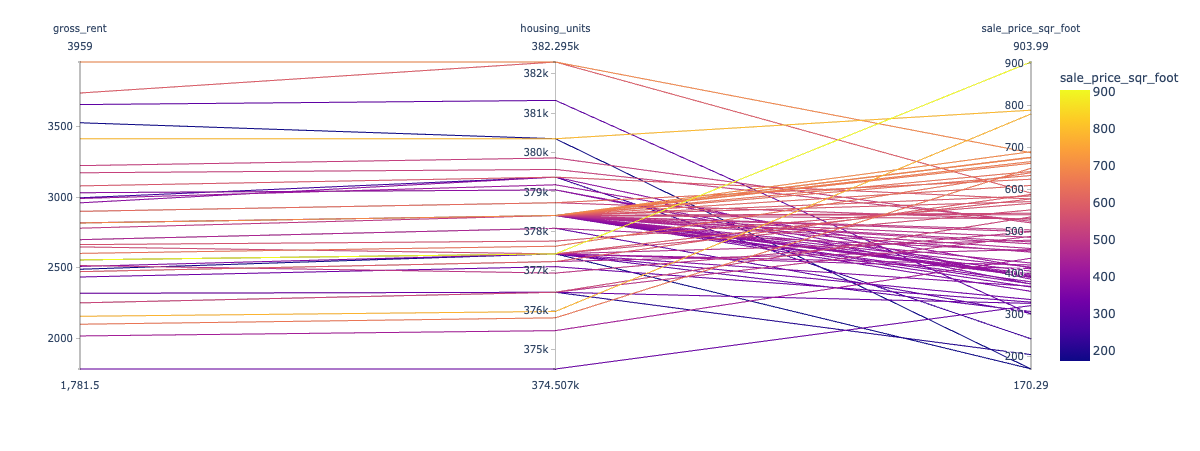

In [79]:
# This one contains all of the neighborhoods, not just the top 10 
neighborhood_all = neighborhood_values.sort_values('sale_price_sqr_foot', ascending=False).reset_index()
px.parallel_coordinates(neighborhood_all, color='sale_price_sqr_foot')

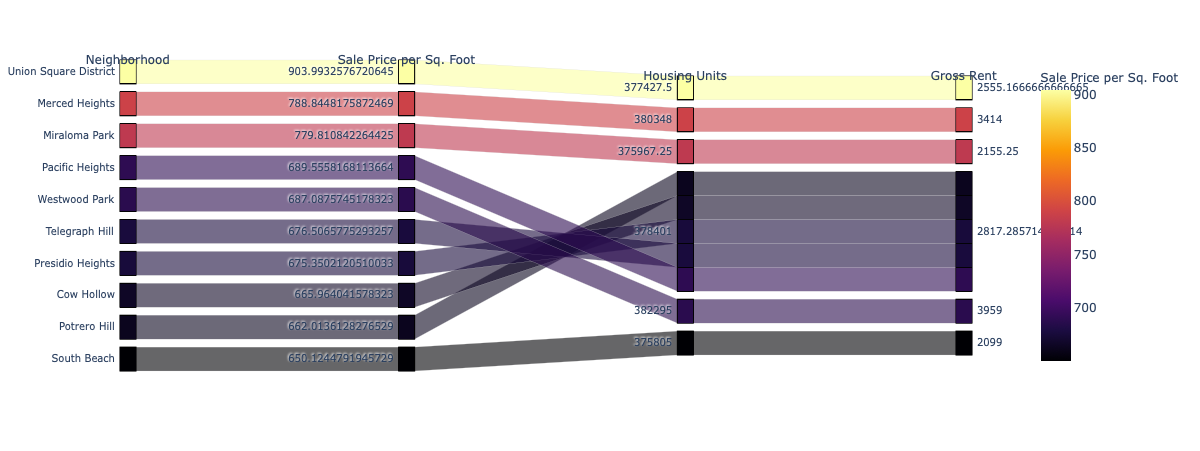

In [85]:
# Parallel Categories Plot
# Once again, I will do top 10 here, and the next will be all neighborhoods 

px.parallel_categories(
    most_expensive,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot": "Sale Price per Sq. Foot",
        "housing_units": "Housing Units",
        "gross_rent": "Gross Rent",
    },
)

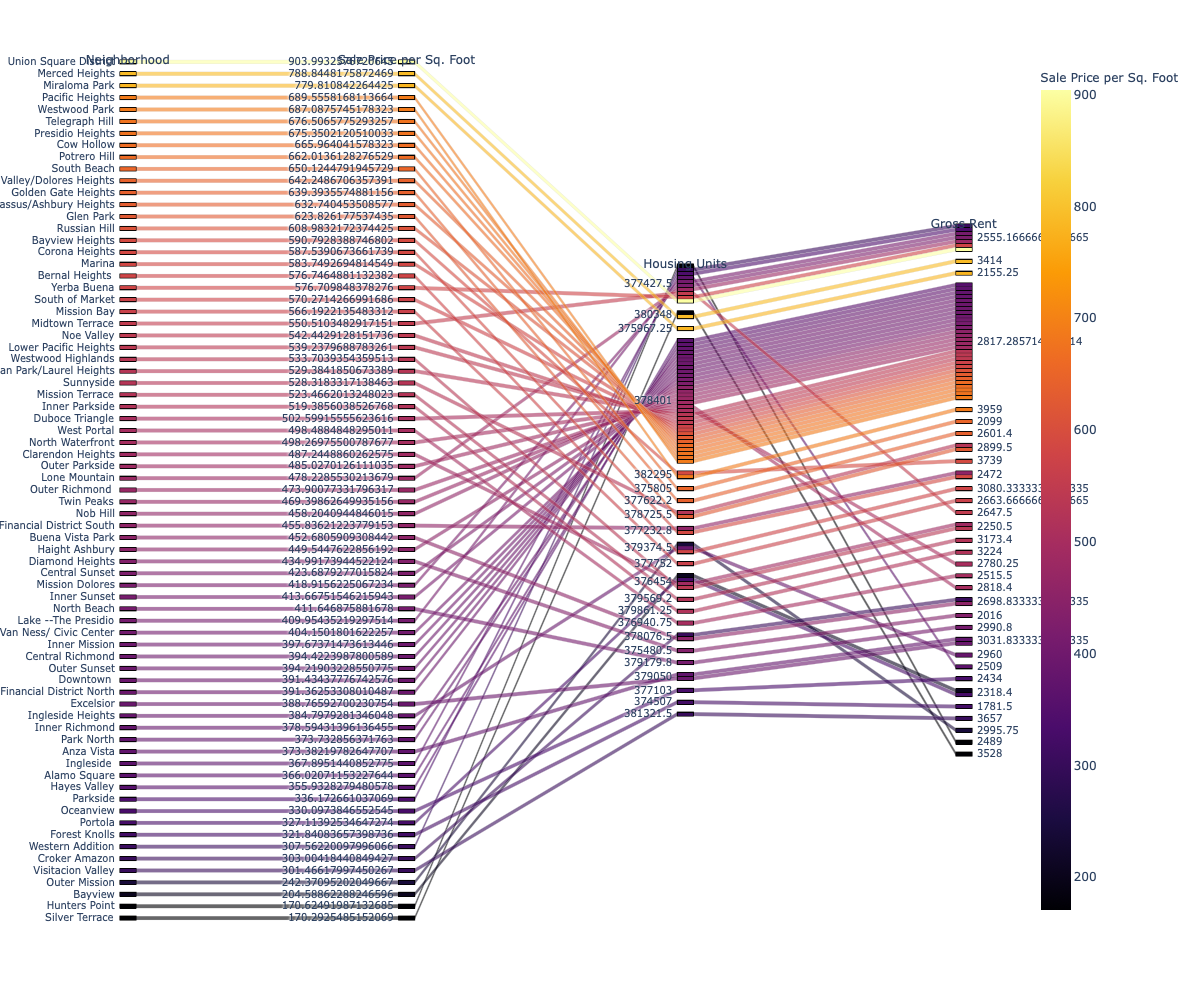

In [92]:
# All Neighborhoods, not just top 10: 

px.parallel_categories(
    neighborhood_all,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot": "Sale Price per Sq. Foot",
        "housing_units": "Housing Units",
        "gross_rent": "Gross Rent",
    },
width=1000, height = 1000)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [93]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [17]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!

Neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0     Alamo Square           366.020712       378401.0  2817.285714
1       Anza Vista           373.382198       379050.0  3031.833333
2          Bayview           204.588623       376454.0  2318.400000
3  Bayview Heights           590.792839       382295.0  3739.000000
4  Bernal Heights            576.746488       379374.5  3080.333333

In [18]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!

Neighborhood        Lat         Lon  sale_price_sqr_foot  \
0      Alamo Square  37.791012 -122.402100           366.020712   
1        Anza Vista  37.779598 -122.443451           373.382198   
2           Bayview  37.734670 -122.401060           204.588623   
3   Bayview Heights  37.728740 -122.410980           590.792839   
4  Buena Vista Park  37.768160 -122.439330           452.680591   

   housing_units   gross_rent  
0       378401.0  2817.285714  
1       379050.0  3031.833333  
2       376454.0  2318.400000  
3       382295.0  3739.000000  
4       378076.5  2698.833333

### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

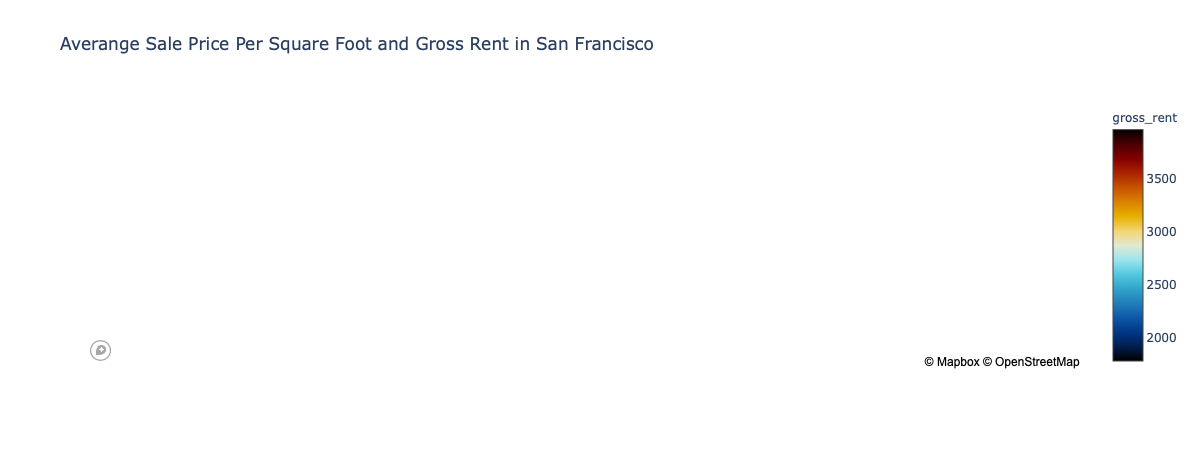

In [19]:
# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!